In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_excel("Offenses Data Test.xlsx")
df.rename(columns={'dateReport (date)':'ReportDate'}, inplace=True)
df.head()

,data_casenum,ReportDate,itype,Zone,Category,Vehicle Related?
0,21-38561,2021-08-17 20:46:00,23H,Z3,Other,N
1,21-38559,2021-08-17 20:10:00,23C,Z2,Other,N
2,21-38559,2021-08-17 20:10:00,23C,Z1,Other,N
3,21-38557,2021-08-17 19:27:00,91J,Z5,Larceny,N
4,21-38547,2021-08-17 18:57:00,35A,Z8,Other,N


### a.The attribute names

In [36]:
df.columns

Index(['data_casenum', 'ReportDate', 'itype', 'Zone', 'Category',
       'Vehicle Related?'],
      dtype='object')

In [37]:
df.dtypes

data_casenum                object
ReportDate          datetime64[ns]
itype                       object
Zone                        object
Category                    object
Vehicle Related?            object
dtype: object

### b.Number of rows and columns

In [38]:
df.shape

(31998, 6)

### c.Are there any null (i.e., missing) values in the target variable? How many null values were there?

In [39]:
df.isna().any()

data_casenum        False
ReportDate          False
itype               False
Zone                 True
Category            False
Vehicle Related?    False
dtype: bool

In [40]:
df.isna().sum()

data_casenum          0
ReportDate            0
itype                 0
Zone                175
Category              0
Vehicle Related?      0
dtype: int64

### 3.Drop NULL (na) values

In [56]:
df.dropna(inplace=True)

### 4.What types of crime are on the rise?

In [50]:
df.Category.value_counts()

Other       22767
Larceny      8813
Rape          229
Homicide       14
Name: Category, dtype: int64

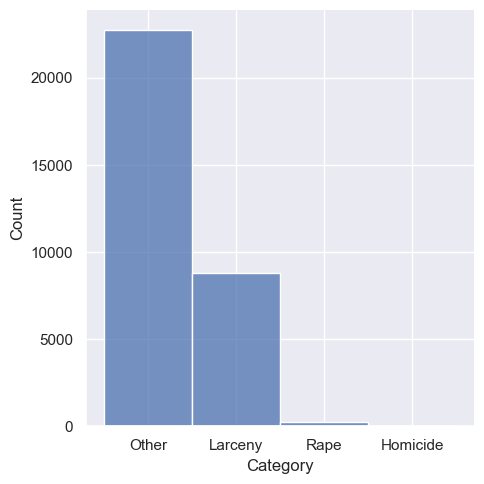

In [113]:
sns.displot(df['Category'],bins=10)

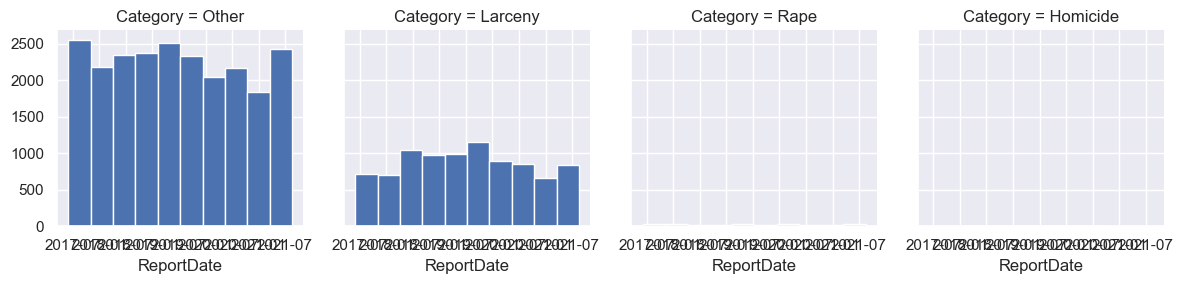

In [52]:
g = sns.FacetGrid(data=df,col='Category')
g.map(plt.hist,'ReportDate')

In [107]:
df1 = pd.get_dummies(data=df, drop_first = False, columns=['Category']) 

In [108]:
df2 = df1.drop(['data_casenum','itype', 'Zone','Vehicle Related?'], axis=1)

In [109]:
df2.head()

,ReportDate,Category_Homicide,Category_Larceny,Category_Other,Category_Rape
0,2021-08-17 20:46:00,0,0,1,0
1,2021-08-17 20:10:00,0,0,1,0
2,2021-08-17 20:10:00,0,0,1,0
3,2021-08-17 19:27:00,0,1,0,0
4,2021-08-17 18:57:00,0,0,1,0


In [110]:
df2.Category_Homicide.value_counts()

0    31809
1       14
Name: Category_Homicide, dtype: int64

In [104]:
df_time=df2.set_index('ReportDate')

<AxesSubplot: xlabel='ReportDate'>

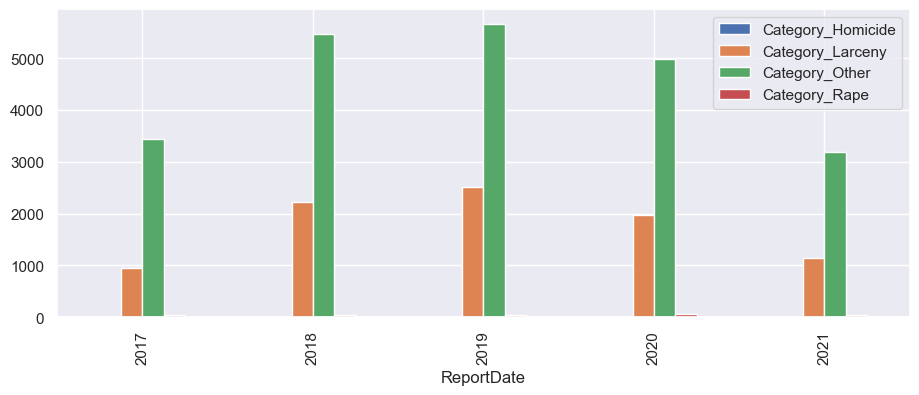

In [111]:
df_time.groupby([df_time.index.year]).sum().plot.bar()

### 5.What area of town are the biggest problem areas? Change over time?

In [112]:
df.Zone.value_counts()

Z1    6125
Z3    5718
Z5    4794
Z6    4344
Z4    4209
Z8    2780
Z2    2327
Z7    1521
1        2
8        1
6        1
4        1
Name: Zone, dtype: int64

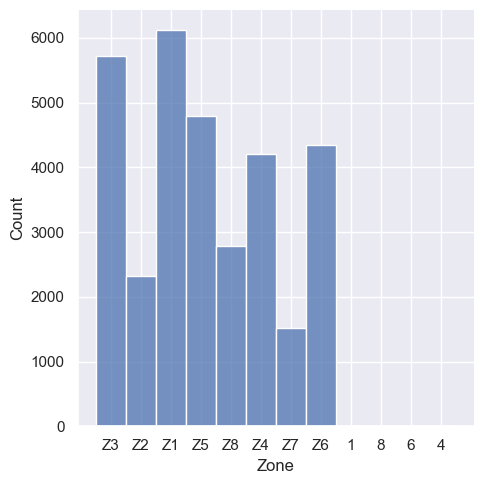

In [120]:
sns.displot(df['Zone'],bins=10)

In [114]:
df1 = pd.get_dummies(data=df, drop_first = False, columns=['Zone']) 

In [115]:
df2 = df1.drop(['data_casenum','itype', 'Category','Vehicle Related?'], axis=1)

In [116]:
df2.head()

,ReportDate,Zone_1,Zone_4,Zone_6,Zone_8,Zone_Z1,Zone_Z2,Zone_Z3,Zone_Z4,Zone_Z5,Zone_Z6,Zone_Z7,Zone_Z8
0,2021-08-17 20:46:00,0,0,0,0,0,0,1,0,0,0,0,0
1,2021-08-17 20:10:00,0,0,0,0,0,1,0,0,0,0,0,0
2,2021-08-17 20:10:00,0,0,0,0,1,0,0,0,0,0,0,0
3,2021-08-17 19:27:00,0,0,0,0,0,0,0,0,1,0,0,0
4,2021-08-17 18:57:00,0,0,0,0,0,0,0,0,0,0,0,1


In [117]:
df2.Zone_1.value_counts()

0    31821
1        2
Name: Zone_1, dtype: int64

In [118]:
df_time=df2.set_index('ReportDate')

<AxesSubplot: xlabel='ReportDate'>

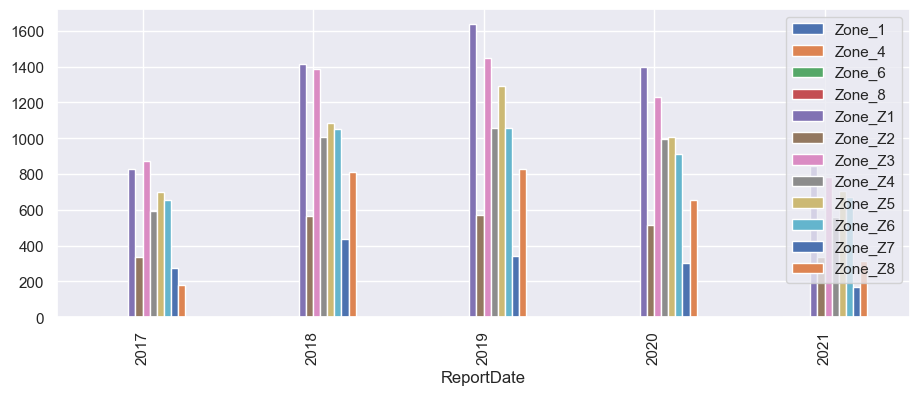

In [119]:
df_time.groupby([df_time.index.year]).sum().plot.bar()